In [1]:
using Pkg
Pkg.activate("/Users/ryansenne/Documents/GitHub/SSM")

  Activating project at `\Users\ryansenne\Documents\GitHub\SSM`

In [2]:
include("/Users/ryansenne/Documents/Github/SSM//src/SSM.jl")
using LinearAlgebra
using Plots
using Distributions
using Random
using .SSM
using StatsBase

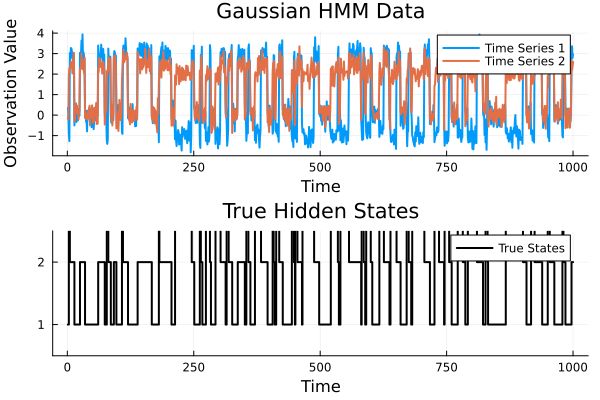

In [3]:
# generate data from a Gaussian HMM model
Random.seed!(1234)

A = [0.9 0.02 0.08; 0.1 0.9 0.0; 0.0 0.1 0.9]
means = [[0.0, 0.0], [3.0, 2.5], [-1.0, 2.0]]
covs = [
    [0.1 0.0; 0.0 0.1],  # Covariance matrix for state 1
    [0.1 0.0; 0.0 0.1],  # Covariance matrix for state 2
    [0.1 0.0; 0.0 0.1]   # Covariance matrix for state 3
]
emissions_models = [GaussianEmission(mean, cov) for (mean, cov) in zip(means, covs)]

hmm = HMM(A, emissions_models, [0.33, 0.33, 0.34], 2)

states, observations = SSM.sample(hmm, 1000)

plot(observations[:, 1], observations[:, 2], seriestype=:scatter, legend=false)

function plot_hmm_data(observations, states)
    # Create a new plot with the first time series
    p1 = plot(observations[:, 1], label="Time Series 1", legend=:topright, title="Gaussian HMM Data", xlabel="Time", ylabel="Observation Value", linewidth=2)
    # Add the second time series to the same plot
    plot!(observations[:, 2], label="Time Series 2", linewidth=2)

    # Plot the true states below
    p2 = plot(states, line=:steppost, label="True States", title="True Hidden States", xlabel="Time", ylims=(0.5, 2.5), yticks=[1, 2], linewidth=2, color=:black)

    # Display the plots vertically aligned
    plot(p1, p2, layout=(2, 1), link=:x)
end

plot_hmm_data(observations, states)

In [5]:
model = HMM(observations, 2, "Gaussian")

HMM{GaussianEmission}([0.4140624518716696 0.5859375481283303; 0.7772351160345606 0.2227648839654394], GaussianEmission[GaussianEmission([0.2576537049653866, 2.68726380650396], [0.7025337516086927 -0.18055634455602593; -0.18055634455602593 0.8744946614296302]), GaussianEmission([2.574302737515911, 2.5633881314638773], [0.31340661594952973 -0.24699502506729756; -0.24699502506729756 1.0362224226789774])], [0.010266023624404175, 0.9897339763755958], 2)

In [6]:
baumWelch!(model, observations, 100)

In [7]:
viterbi(model, observations)

1000-element Vector{Int64}:
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [5]:
k = 3
data_dim = 2
# generate random data
data = randn(100, data_dim)

# kmeanspp_initialization(data, 3)
# initialize HMM
hmm = HMM(data, k, "Gaussian")
alpha = SSM.backward(hmm, data)

3×100 Matrix{Float64}:
 -312.225  -310.537  -306.96   -306.968  …  -8.64112  -6.40389  -4.04181  0.0
 -312.948  -310.908  -307.666  -305.256     -9.22172  -7.02849  -4.74032  0.0
 -312.555  -310.699  -307.308  -306.314     -8.97752  -6.70387  -4.40879  0.0